In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from utilities import *
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline

/Users/ronlitman/.virtualenvs/sd36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Final Test - Q1

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Setting-up-the-Data|" data-toc-modified-id="Setting-up-the-Data|-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setting up the Data|</a></span><ul class="toc-item"><li><span><a href="#Spliting-the-Data-into-a-random-unseen-test-file" data-toc-modified-id="Spliting-the-Data-into-a-random-unseen-test-file-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Spliting the Data into a random unseen test file</a></span></li></ul></li><li><span><a href="#Linaer-model---No-regulation" data-toc-modified-id="Linaer-model---No-regulation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Linaer model - No regulation</a></span></li><li><span><a href="#Linaer-model---Lasso" data-toc-modified-id="Linaer-model---Lasso-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Linaer model - Lasso</a></span><ul class="toc-item"><li><span><a href="#Finding-S-using-10-fold-CV" data-toc-modified-id="Finding-S-using-10-fold-CV-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Finding S using 10 fold CV</a></span></li><li><span><a href="#Training-Lasso" data-toc-modified-id="Training-Lasso-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Training Lasso</a></span></li></ul></li><li><span><a href="#Linaer-model---Ridge" data-toc-modified-id="Linaer-model---Ridge-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Linaer model - Ridge</a></span><ul class="toc-item"><li><span><a href="#Finding-lammda-using-10-fold-CV" data-toc-modified-id="Finding-lammda-using-10-fold-CV-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Finding lammda using 10 fold CV</a></span></li><li><span><a href="#Training-Ridge" data-toc-modified-id="Training-Ridge-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Training Ridge</a></span></li></ul></li><li><span><a href="#KNN---cosine-similarity" data-toc-modified-id="KNN---cosine-similarity-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>KNN - cosine similarity</a></span><ul class="toc-item"><li><span><a href="#Finding-K-using-10-fold-CV" data-toc-modified-id="Finding-K-using-10-fold-CV-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Finding K using 10 fold CV</a></span></li><li><span><a href="#Training-KNN---cosine-similarity" data-toc-modified-id="Training-KNN---cosine-similarity-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Training KNN - cosine similarity</a></span></li></ul></li><li><span><a href="#KNN---Euclidean" data-toc-modified-id="KNN---Euclidean-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>KNN - Euclidean</a></span><ul class="toc-item"><li><span><a href="#Finding-K-using-10-fold-CV" data-toc-modified-id="Finding-K-using-10-fold-CV-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Finding K using 10 fold CV</a></span></li><li><span><a href="#Training-KNN---Euclidean" data-toc-modified-id="Training-KNN---Euclidean-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Training KNN - Euclidean</a></span></li></ul></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Gradient Boosting</a></span></li><li><span><a href="#Light-Gradient-Boosting" data-toc-modified-id="Light-Gradient-Boosting-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Light Gradient Boosting</a></span></li><li><span><a href="#Results-Summary---Test-data" data-toc-modified-id="Results-Summary---Test-data-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Results Summary - Test data</a></span></li></ul></div>

## Intro

During the Netflix competition (my partner was Nadav Nagel) our best score was - 0.75468, where a summary of what we have done is:

Feature engineering:
* For filling the missing data we used a linear model (with L1) to predict a column missing values based on all the column that we already had full prediction base on them (that is the first column we predicted is the 15th base on the first 14 full columns)
* Overall Avg rating
* Avg rating the same day as movie Y
* Avg rating the same week as movie Y
* Std rating the same day as movie Y
* Std rating the same week as movie Y
* Number of 1 score on the same day as movie Y (was added only now thanks to the winners presentation)
* Number of 5 score on the same day as movie Y (was added only now thanks to the winners presentation)
* A vector of 1/0 base on rated the movie or not (was added only now thanks to the winners presentation)

After getting the full Data frame ready for modling we tried sevreal methods:
* Linaer model - Lasso
* Linaer model - Ridge
* KNN - cosine similarity
* KNN - Euclidean
* Gradient Boosting
* Light Gradient Boosting (see documentation here: https://lightgbm.readthedocs.io/en/latest/ / https://papers.nips.cc/paper/6907-lightgbm-a-highly-efficient-gradient-boosting-decision-tree.pdf)

For the submissions we mainly used Light Gradient Boosting, i will now show tha main results for each model

## Setting up the Data|

In [2]:
movie_titles, train, test = load_and_set_data()

train, test = set_df(train, test)

### Spliting the Data into a random unseen test file

Some of the models requires some tuning of hyper param so we will save the test data and will use it to predict only at the end (20% = 2000 samples)

In [5]:
x_train, x_test, y_train, y_test = split_train_dev(train['train_ratings_all'], train['train_y_rating'], test_size=0.2)

## Linaer model - No regulation

In [6]:
mse_train_reg_lin, mse_test_reg_lin = run_lin_model(x_train, x_test, y_train, y_test, method='normal')



Training a Linear model - normal with alpha = 0.006
RMSE on Train is: 0.7402964456260299
RMSE on Test is: 0.7589485141146299


## Linaer model - Lasso

### Finding S using 10 fold CV

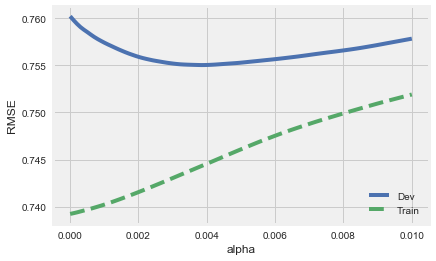

In [7]:
alphas = np.linspace(0.0, 0.01, num=100)
alphas_opt = run_cv_to_find_lammda(x_train, y_train, alphas, method='Lasso')

### Training Lasso

using the S we found in the 10 fold CV and predicting on the unseen test

In [8]:
mse_train_reg_lin_l1, mse_test_reg_lin_l1 = run_lin_model(x_train, x_test, y_train, y_test, alpha=alphas_opt, method='Lasso')



Training a Linear model - Lasso with alpha = 0.0038383838383838384
RMSE on Train is: 0.7451512345660355
RMSE on Test is: 0.7541621281531184


## Linaer model - Ridge

### Finding lammda using 10 fold CV

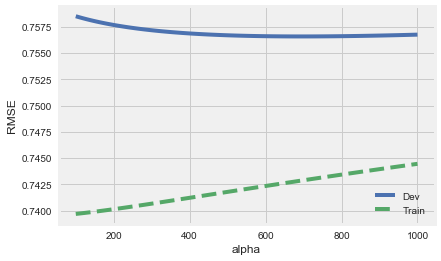

In [9]:
alphas = np.linspace(100, 1000, num=100)
alphas_opt = run_cv_to_find_lammda(x_train, y_train, alphas, method='Ridge')

### Training Ridge

using the lammda we found in the 10 fold CV and predicting on the unseen test

In [10]:
mse_train_reg_lin_l2, mse_test_reg_lin_l2 = run_lin_model(x_train, x_test, y_train, y_test, alpha=alphas_opt, method='Ridge')



Training a Linear model - Ridge with alpha = 690.909090909091
RMSE on Train is: 0.7433736373512059
RMSE on Test is: 0.7547471986161586


## KNN - cosine similarity

### Finding K using 10 fold CV

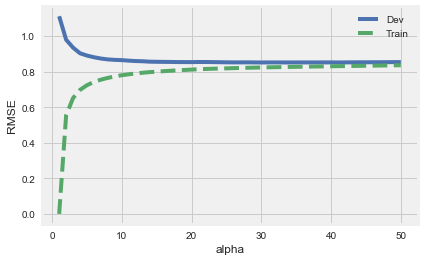

In [11]:
ks = np.linspace(1, 50, num=50)
k_opt = run_cv_to_find_k(x_train, y_train, ks, metric='cosine')

### Training KNN - cosine similarity

using the K we found in the 10 fold CV and predicting on the unseen test

In [12]:
mse_test_reg_cosine = run_knn_cosine(x_train, x_test, y_train, y_test, k=k_opt)



Training a KNN model with cosine_similarity for k = 30.0
RMSE on Train is: 0.8840003028845634
RMSE on Test is: 0.8829565493273155


## KNN - Euclidean

### Finding K using 10 fold CV

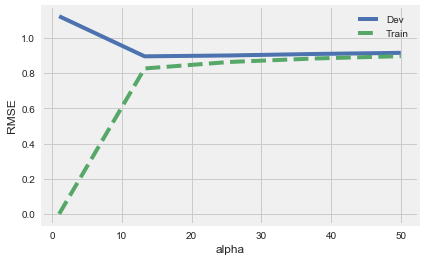

In [13]:
ks = np.linspace(1, 50, num=5)
k_opt = run_cv_to_find_k(x_train, y_train, ks, metric='euclidean')

### Training KNN - Euclidean

using the K we found in the 10 fold CV and predicting on the unseen test

In [14]:
mse_test_reg_euclidean = run_knn_euclidean(x_train, x_test, y_train, y_test, k=k_opt)



Training a KNN model with euclidean for k = 13.25
RMSE on Train is: 0.9495755191136722
RMSE on Test is: 0.9503815833653344


## Gradient Boosting

In [15]:
mse_train_reg_gb, mse_test_reg_gb = run_gb(x_train, x_test, y_train, y_test)



Training a GradientBoostingRegressor model
Params that are being used for training are: {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'ls', 'max_features': 'sqrt'}
RMSE on Train is: 0.2233448270277548
RMSE on Test is: 0.7595241661802443


## Light Gradient Boosting

For running the LGB model we used an Early stopping rule so we had to devide the train data to train and dev and then predict on the unseen test data

In [16]:
mse_train_reg_lgb, mse_dev_reg_lgb, mse_test_reg_lgb = run_lgb_model(x_train, x_test, y_train, y_test)



Training a lightgbm model
Params that are being used for training are: {'objective': 'regression', 'metric': 'rmse', 'num_leaves': 40, 'learning_rate': 0.005, 'bagging_fraction': 0.6, 'feature_fraction': 0.6, 'bagging_frequency': 1, 'verbosity': -1}
Training until validation scores don't improve for 500 rounds.
[150]	training's rmse: 0.79038	valid_1's rmse: 0.83564
[300]	training's rmse: 0.714508	valid_1's rmse: 0.788761
[450]	training's rmse: 0.668743	valid_1's rmse: 0.771049
[600]	training's rmse: 0.633243	valid_1's rmse: 0.762643
[750]	training's rmse: 0.603134	valid_1's rmse: 0.759055
[900]	training's rmse: 0.576492	valid_1's rmse: 0.757015
[1050]	training's rmse: 0.552845	valid_1's rmse: 0.756088
[1200]	training's rmse: 0.531573	valid_1's rmse: 0.755273
[1350]	training's rmse: 0.512207	valid_1's rmse: 0.754825
[1500]	training's rmse: 0.493889	valid_1's rmse: 0.754268
[1650]	training's rmse: 0.476897	valid_1's rmse: 0.753713
[1800]	training's rmse: 0.460997	valid_1's rmse: 0.7532

## Results Summary - Test data

In [17]:
print('For Linaer model - Lasso the RMSE is: {}'.format(mse_test_reg_lin_l1))
print('For Linaer model - Ridge the RMSE is: {}'.format(mse_test_reg_lin_l2))
print('For KNN - cosine similarity the RMSE is: {}'.format(mse_test_reg_cosine))
print('For KNN - Euclidean the RMSE is: {}'.format(mse_test_reg_euclidean))
print('For Gradient Boosting the RMSE is: {}'.format(mse_test_reg_gb))
print('For Light Gradient Boosting the RMSE is: {}'.format(mse_test_reg_lgb))

For Linaer model - Lasso the RMSE is: 0.7541621281531184
For Linaer model - Ridge the RMSE is: 0.7547471986161586
For KNN - cosine similarity the RMSE is: 0.8829565493273155
For KNN - Euclidean the RMSE is: 0.9503815833653344
For Gradient Boosting the RMSE is: 0.7595241661802443
For Light Gradient Boosting the RMSE is: 0.7544891019423587
